## Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import dsa
from dsa import *
from datasets import image
from models import resnet
import pickle

## Hardware allocation strategy

In [2]:
# limit tf to use the first gpu
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the second GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


2022-03-02 21:56:01.748966: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 21:56:02.579308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10078 MB memory:  -> device: 1, name: NVIDIA TITAN V, pci bus id: 0000:5e:00.0, compute capability: 7.0


## Load dataset: `cifar-10`

In [3]:
target_ds, aux_ds = image.load_cifar10()

## Attack with different split layers

In [ ]:
cifar10_dsa = {}
log = {}

In [4]:
# To better tune hyperparam, we put one run in one cell

for split in [4]:
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet(split=split, class_num=10)
    cifar10_dsa["cifar10-split="+str(split)] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    log["cifar10-split="+str(split)] = cifar10_dsa["cifar10-split="+str(split)].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        lr=0.001,
        batch_size=64,
        iterations=10000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.001, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.0001,
        lr_c=0.001,
        iter_d=50,   # the number of iterations to train the decoder on auxiliary data
        w=500.,
        verbose=True,
        log_freq=200)

======Split level is 4======


2022-03-02 21:56:12.765887: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


Iteration 200, average attack MSE: 0.2657552571594715
Iteration 400, average attack MSE: 0.1196712451800704
Iteration 600, average attack MSE: 0.06115189051255584
Iteration 800, average attack MSE: 0.05171306449919939
Iteration 1000, average attack MSE: 0.04917162749916315
Iteration 1200, average attack MSE: 0.048634554762393235
Iteration 1400, average attack MSE: 0.04907117938622832
Iteration 1600, average attack MSE: 0.049325829353183505
Iteration 1800, average attack MSE: 0.05093363810330629
Iteration 2000, average attack MSE: 0.04865454785525799
Iteration 2200, average attack MSE: 0.04630239963531494
Iteration 2400, average attack MSE: 0.04511187149211764
Iteration 2600, average attack MSE: 0.046734133660793306
Iteration 2800, average attack MSE: 0.04515100559219718
Iteration 3000, average attack MSE: 0.044778611436486246
Iteration 3200, average attack MSE: 0.04463563002645969
Iteration 3400, average attack MSE: 0.045011616759002206
Iteration 3600, average attack MSE: 0.04342747557

In [5]:
for split in [3]:
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet(split=split, class_num=10)
    cifar10_dsa["cifar10-split="+str(split)] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    log["cifar10-split="+str(split)] = cifar10_dsa["cifar10-split="+str(split)].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        lr=0.001,
        batch_size=64,
        iterations=10000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.001, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.0001,
        lr_c=0.001,
        iter_d=50,   # the number of iterations to train the decoder on auxiliary data
        w=500.,
        verbose=True,
        log_freq=200)

======Split level is 3======
Iteration 200, average attack MSE: 0.2363360284268856
Iteration 400, average attack MSE: 0.1114282121323049
Iteration 600, average attack MSE: 0.03293481974862516
Iteration 800, average attack MSE: 0.022998521160334347
Iteration 1000, average attack MSE: 0.02145264595746994
Iteration 1200, average attack MSE: 0.0212853520270437
Iteration 1400, average attack MSE: 0.020199969811365008
Iteration 1600, average attack MSE: 0.020289946543052793
Iteration 1800, average attack MSE: 0.020265762181952595
Iteration 2000, average attack MSE: 0.019803590960800647
Iteration 2200, average attack MSE: 0.01937149228528142
Iteration 2400, average attack MSE: 0.019531502947211267
Iteration 2600, average attack MSE: 0.01900529123377055
Iteration 2800, average attack MSE: 0.018786331489682197
Iteration 3000, average attack MSE: 0.018331946837715805
Iteration 3200, average attack MSE: 0.018310578064993022
Iteration 3400, average attack MSE: 0.01827289876528084
Iteration 3600, a

In [6]:
for split in [2]:
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet(split=split, class_num=10)
    cifar10_dsa["cifar10-split="+str(split)] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    log["cifar10-split="+str(split)] = cifar10_dsa["cifar10-split="+str(split)].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        lr=0.001,
        batch_size=64,
        iterations=10000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.001, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.0001,
        lr_c=0.001,
        iter_d=50,   # the number of iterations to train the decoder on auxiliary data
        w=500.,
        verbose=True,
        log_freq=200)

======Split level is 2======
Iteration 200, average attack MSE: 0.2407099509984255
Iteration 400, average attack MSE: 0.09179774248972535
Iteration 600, average attack MSE: 0.028455758392810823
Iteration 800, average attack MSE: 0.02085138755850494
Iteration 1000, average attack MSE: 0.02018555554561317
Iteration 1200, average attack MSE: 0.019205837389454247
Iteration 1400, average attack MSE: 0.01868137582205236
Iteration 1600, average attack MSE: 0.017552516371943057
Iteration 1800, average attack MSE: 0.01709112954791635
Iteration 2000, average attack MSE: 0.017176023060455917
Iteration 2200, average attack MSE: 0.016758637935854494
Iteration 2400, average attack MSE: 0.016287073399871586
Iteration 2600, average attack MSE: 0.015369302066974342
Iteration 2800, average attack MSE: 0.015658477512188254
Iteration 3000, average attack MSE: 0.015238799504004419
Iteration 3200, average attack MSE: 0.01512794422917068
Iteration 3400, average attack MSE: 0.014862354211509228
Iteration 3600

In [10]:
with open('log/cifar10.pkl', 'wb') as f:
    pickle.dump(log, f)

tf.Tensor(0.014689593, shape=(), dtype=float32)
tf.Tensor(0.019932337, shape=(), dtype=float32)
tf.Tensor(0.038547784, shape=(), dtype=float32)


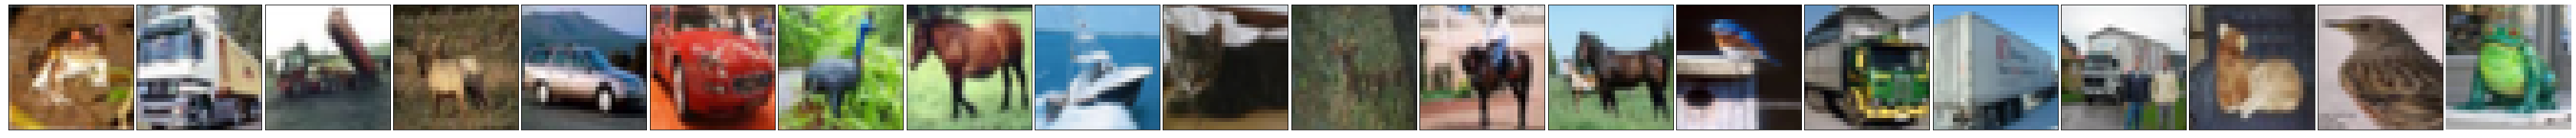

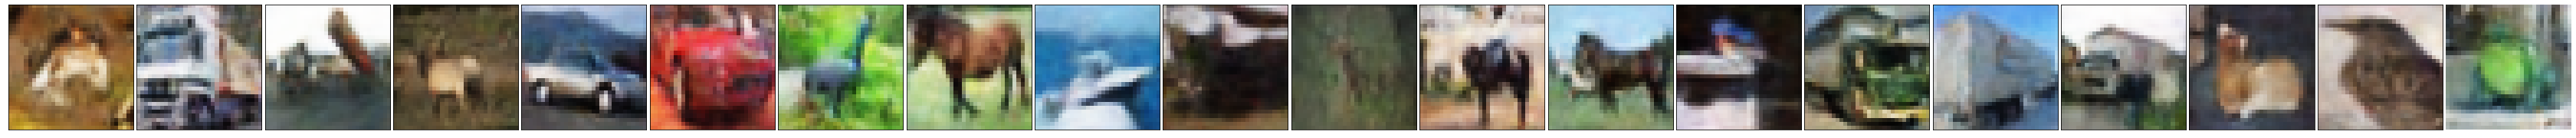

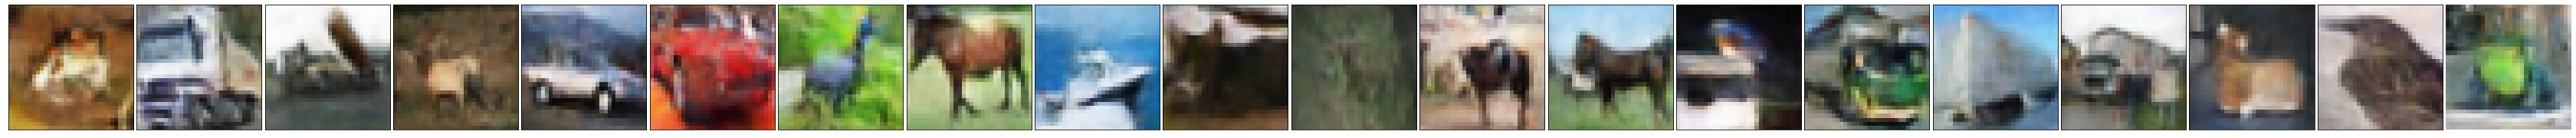

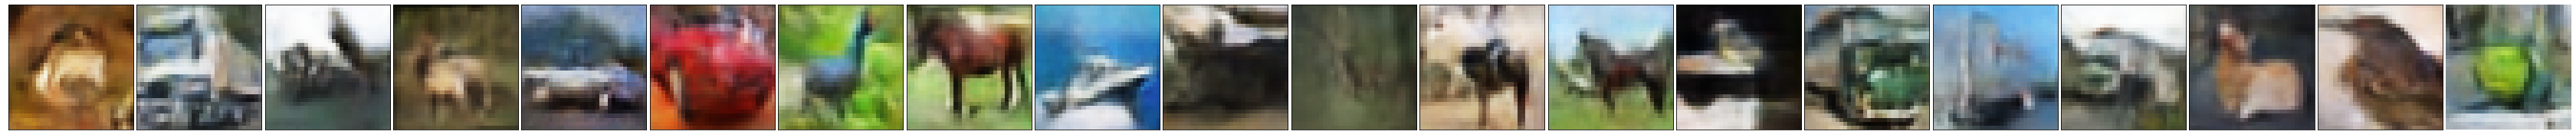

In [7]:
imgs = image.load_cifar10(take_first=20)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno')
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
    return fig

fig = plot(imgs)
for split in [2,3,4]:
    l, rec_res = cifar10_dsa["cifar10-split="+str(split)].attack_examples(imgs)
    fig = plot(rec_res)
    print(l)

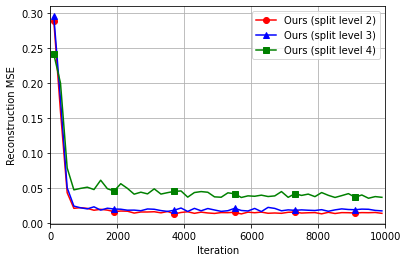

In [13]:
with open('log/cifar10.pkl', 'rb') as f:
    log = pickle.load(f)

from matplotlib.pyplot import figure
# figure(figsize=(6.4,4.8))
log_freq = 200
# plt.yscale('logit')
plt.xlim([0,10000])
plt.grid()
sampled_log_2 = [log["cifar10-split=2"][:,1][i*log_freq] for i in range(int(len(log["cifar10-split=2"][:,0])/log_freq))]
sampled_log_3 = [log["cifar10-split=3"][:,1][i*log_freq] for i in range(int(len(log["cifar10-split=3"][:,0])/log_freq))]
sampled_log_4 = [log["cifar10-split=4"][:,1][i*log_freq] for i in range(int(len(log["cifar10-split=4"][:,0])/log_freq))]
ran = [i * log_freq + log_freq/2 for i in range(int(10000/log_freq))]
plt.plot(ran, sampled_log_2, 'ro-', ran, sampled_log_3, 'b^-', ran, sampled_log_4, 'gs-', markevery=9)
plt.ylabel('Reconstruction MSE')
plt.xlabel('Iteration')
plt.legend(["Ours (split level 2)", "Ours (split level 3)", "Ours (split level 4)"])
plt.savefig("fig/cifar10-all.pdf", bbox_inches='tight')